In [126]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [90]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()


In [98]:
#  3. Convert the June temperatures to a list.
june_temps_list = list(june_temps)


In [101]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps_list, columns=['date','temperature'])
#june_temps_df.set_index(june_temps_df['date'], inplace=True)
june_temps_df = june_temps_df.sort_index()
pd.set_option('display.max_rows', 2000)
june_temps_df


,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
5,2010-06-06,78.0
6,2010-06-07,77.0
7,2010-06-08,78.0
8,2010-06-09,78.0
9,2010-06-10,79.0


In [102]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [103]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [106]:
# 7. Convert the December temperatures to a list.
dec_temps_list = list(dec_temps)

In [107]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps_list, columns=['date','temperature'])
#june_temps_df.set_index(june_temps_df['date'], inplace=True)
dec_temps_df = dec_temps_df.sort_index()
pd.set_option('display.max_rows', 2000)
dec_temps_df

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
5,2010-12-08,67.0
6,2010-12-09,77.0
7,2010-12-10,66.0
8,2010-12-11,69.0
9,2010-12-12,68.0


In [108]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [123]:
dec_temp_count = dec_temps_df.groupby('temperature').count()
dec_temp_count

,date
temperature,
56.0,2
57.0,2
58.0,1
59.0,1
60.0,3
61.0,6
62.0,15
63.0,22
64.0,28


In [142]:
bins = [55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85]

(array([  0.,   0.,   0.,   0.,   1.,   6.,  33., 131., 249., 314., 369.,
        359., 194.,  39.,   5.]),
 array([55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85]),
 <BarContainer object of 15 artists>)

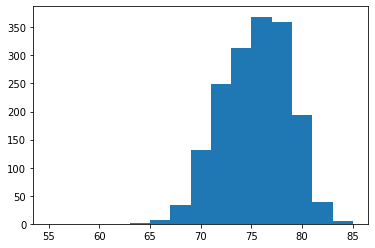

In [143]:
plt.hist(june_temps_df['temperature'], bins)

(array([  2.,   3.,   4.,  21.,  50.,  90., 167., 293., 340., 286., 175.,
         70.,  12.,   3.,   1.]),
 array([55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85]),
 <BarContainer object of 15 artists>)

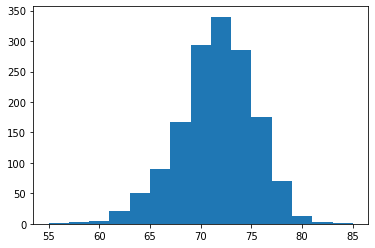

In [144]:
plt.hist(dec_temps_df['temperature'], bins)

<AxesSubplot:>

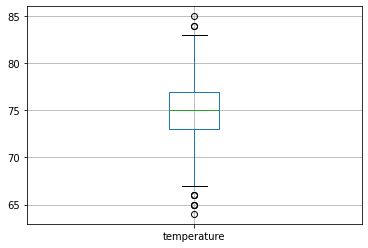

In [114]:
june_temps_df.boxplot()

<AxesSubplot:>

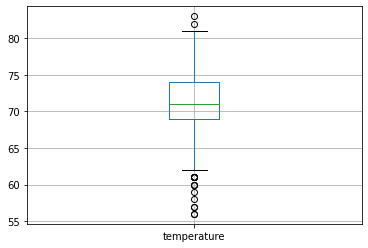

In [112]:
dec_temps_df.boxplot()

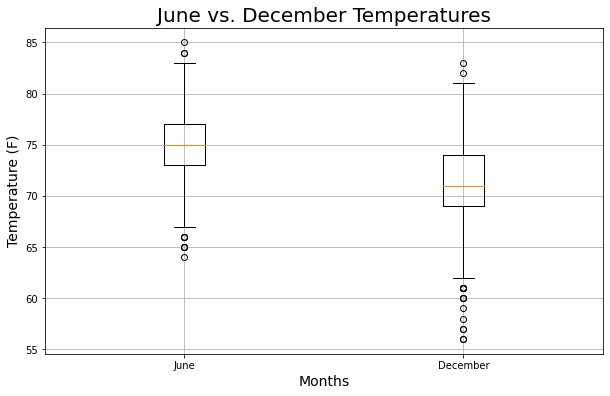

In [141]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["June", "December"]
month_temp_data = [june_temps_df['temperature'], dec_temps_df['temperature']]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('June vs. December Temperatures',fontsize=20)
ax.set_ylabel('Temperature (F)',fontsize=14)
ax.set_xlabel("Months",fontsize=14)
ax.boxplot(month_temp_data, labels=x_labels)
ax.set_yticks(np.arange(55, 90, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("June_December_Temp_Boxplot.png")
plt.show()